In [1]:
import pandas as pd
import re
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.stem.porter import PorterStemmer
from collections import Counter
import statistics
import nltk
from nltk.corpus import stopwords 
import math
import random

In [2]:
df = pd.read_csv('train.tsv',sep='\t')

<font size="6" >Feature Exploration and Feature Engineering</font>

In [3]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [4]:
df['ln_revenue'] = np.log(df['revenue']+1)

In [5]:
average_ln_revenue = df['ln_revenue'].mean()
average_revenue = df['revenue'].mean()
average_revenue = average_ln_revenue
train_set_size = len(df)

In [6]:
df.corr()

,budget,id,popularity,revenue,runtime,video,vote_average,vote_count,ln_revenue
budget,1.000000,-0.045909,0.508048,0.753590,0.193121,-0.026635,0.020289,0.607103,0.483225
id,-0.045909,1.000000,0.146549,-0.001979,-0.017272,0.056707,0.004266,-0.002634,-0.110578
popularity,0.508048,0.146549,1.000000,0.567924,0.140087,-0.053811,0.232102,0.633513,0.432581
revenue,0.753590,-0.001979,0.567924,1.000000,0.183223,-0.025021,0.159344,0.769808,0.484683
runtime,0.193121,-0.017272,0.140087,0.183223,1.000000,0.135716,0.302452,0.179196,0.205085
video,-0.026635,0.056707,-0.053811,-0.025021,0.135716,1.000000,-0.057794,-0.029589,-0.041816
vote_average,0.020289,0.004266,0.232102,0.159344,0.302452,-0.057794,1.000000,0.284642,0.150904
vote_count,0.607103,-0.002634,0.633513,0.769808,0.179196,-0.029589,0.284642,1.000000,0.427802
ln_revenue,0.483225,-0.110578,0.432581,0.484683,0.205085,-0.041816,0.150904,0.427802,1.000000


In [7]:
df.corr(method='spearman')

,budget,id,popularity,revenue,runtime,video,vote_average,vote_count,ln_revenue
budget,1.000000,-0.213341,0.559653,0.686852,0.252063,-0.043986,-0.016472,0.620679,0.686852
id,-0.213341,1.000000,-0.189962,-0.264908,-0.083596,0.042096,-0.118153,-0.237973,-0.264908
popularity,0.559653,-0.189962,1.000000,0.636686,0.164733,-0.082624,0.222627,0.857544,0.636686
revenue,0.686852,-0.264908,0.636686,1.000000,0.274395,-0.051778,0.132838,0.702440,1.000000
runtime,0.252063,-0.083596,0.164733,0.274395,1.000000,0.054455,0.342145,0.191168,0.274395
video,-0.043986,0.042096,-0.082624,-0.051778,0.054455,1.000000,-0.016486,-0.095960,-0.051778
vote_average,-0.016472,-0.118153,0.222627,0.132838,0.342145,-0.016486,1.000000,0.278710,0.132838
vote_count,0.620679,-0.237973,0.857544,0.702440,0.191168,-0.095960,0.278710,1.000000,0.702440
ln_revenue,0.686852,-0.264908,0.636686,1.000000,0.274395,-0.051778,0.132838,0.702440,1.000000


In [8]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,ln_revenue
count,5.215000e+03,5215.000000,5215.000000,5.215000e+03,5211.000000,5215.000000,5215.000000,5215.000000
mean,2.147967e+07,98768.673442,10.016559,6.538743e+07,108.027442,6.399099,1062.859636,15.897057
std,3.631509e+07,143992.708567,7.075799,1.432381e+08,22.740973,0.943931,2097.172266,3.076433
min,0.000000e+00,5.000000,1.519000,1.000000e+00,0.000000,0.000000,0.000000,0.693147
25%,0.000000e+00,10136.000000,6.264000,2.360718e+06,94.000000,5.900000,74.000000,14.674476
50%,6.500000e+06,24662.000000,9.009000,1.515620e+07,104.000000,6.400000,290.000000,16.533920
75%,2.600000e+07,121704.000000,11.801000,6.214247e+07,118.000000,7.100000,1028.000000,17.944940
max,3.800000e+08,679106.000000,151.237000,2.046240e+09,465.000000,10.000000,24834.000000,21.439270


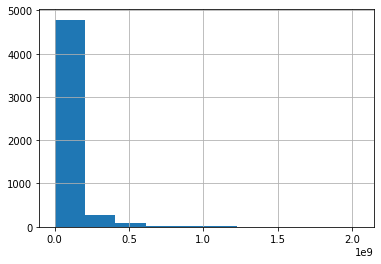

In [9]:
df['revenue'].hist()

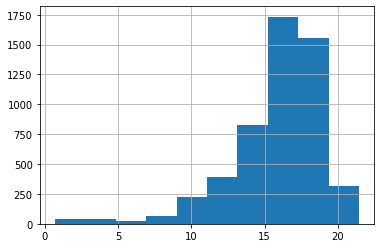

In [10]:
df['ln_revenue'].hist()

<font size="4" >
    backdrop_path:
</font>

Links to some images - removed from the analysis

In [11]:
df['backdrop_path']

0       /7IBpOrw0ATwL1AOV97mtsceDpYs.jpg
1       /lYeE7k0OR3HXyoq7FeswyaxFJvL.jpg
2       /gVXLIfMR2hLmkn0nACctlMCJBfx.jpg
3       /rKjE17ncAGNzeImNWbdGTimzjtk.jpg
4       /zcJxJVhvxNHJJ2J7Q7NhgO9nPUV.jpg
                      ...               
5210                                 NaN
5211    /sOw7TZzt3vRQXXCrwdspSHwCJDR.jpg
5212    /5txDq5g0JeCKpemRM2CpT7H2aP3.jpg
5213    /1dXTsaFxHoF9cas08UjAqE8NqOW.jpg
5214    /yZjbReSRgTGf5IZPmwpecPgm1Z1.jpg
Name: backdrop_path, Length: 5215, dtype: object

In [12]:
df = df.drop(['backdrop_path'], axis=1)

<font size="4" >
    release date: 
</font>

we assume that the relevant parts of the relsease date are the year and the month (summer movies might be more profitable)

In [13]:
def get_release_year(date):
    return int(date[:4])

In [14]:
def get_release_month(date):
    return int(date[5:7])

In [15]:
df['release_year'] = df['release_date'].apply(lambda x:get_release_year(x))
df['release_month'] = df['release_date'].apply(lambda x:get_release_month(x))

In [16]:
df = df.drop(['release_date'], axis=1)


<font size="5" >Categorial variables:</font>

We have some features which express belonging to some categories, where in some of them one movie can belong to several categories.

We convert this to a list of categories and analyse the number of categories and categories frequency.

We have some categorial features with a lot of categories, for some of them the movie can belong to more than one category (spoken languages,cast,text features words..). This will be hard for algorithms to handle.

To handle those we use 3 methods:
* One hot encoding of frequent categories.
* Target encoding with smoothing.
* Extracting a boolean variable if the movie belongs to a frequent category (top production comapnies, top production countries)

<font size="4" >Target encoding with smoothing:</font>

* For each of the categories we extract category frequency and the mean revenue of the movies belong to this category.
* For each movie, for each of the categories it belongs to we compute the average revenue of movies belong to this category, excluding the folds of movies which the movie belongs to, to prevent leakage from target to x. 
* The average revenew of the category is smoothed with average revenew overall, with weightes depending on the category frequency.
* For features in which the movie can belong to several categories, we extract as features the min,max,mean and median


<font size="4" >Target encoding equasion:</font>
\begin{equation*}
\frac{n*category\_mean+m*mean}{n+m}
\end{equation*}

* n is the number of movies belonging to the category. 
* category_mean is the mean revenue of movies belonging to the category (excluding current).
* mean is the revenue mean (full dataset)
* m is a hyperparameter which detrmains the weight of the overall mean. If m=n the category mean and mean are equally weighted. 

In [17]:
m = 10
m_belongs_to_collection = m
m_spoken_languages = m
m_original_language = m
m_production_comapnies = m
m_director = m
m_producer = m
m_cast = m
m_keywords = m
m_title = m
m_overview = m
m_tagline = m
m_country_count = m

In [18]:
df.index

RangeIndex(start=0, stop=5215, step=1)

In [19]:
def get_folds(df):
    fold_size = int(train_set_size/5)
    df['random_index'] = pd.Series(random.sample(list(df.index), train_set_size) )
    df['fold'] = df['random_index'].apply(lambda x:int(x/fold_size))
    return dict(df.groupby('fold')['ln_revenue'].sum()),dict(df.groupby('fold')['ln_revenue'].size())

In [20]:
folds_sum,fold_len = get_folds(df)

When one category is possible

In [21]:
def count_categories(series):
    return dict(series.value_counts())

In [22]:
def get_revenue_dict(df,column):
    fold_category_score = [{},{},{},{},{}]
    fold_category_count = [{},{},{},{},{}]
    for fold in [0,1,2,3,4]:
        fold_category_score[fold] = dict(df[df['fold']==fold].groupby(column)['ln_revenue'].sum())
        fold_category_count[fold] = dict(df[df['fold']==fold].groupby(column)['ln_revenue'].size())
    return dict(df.groupby(column)['ln_revenue'].mean()),fold_category_score,fold_category_count

In [23]:
def get_category_score(category,fold,score_dict,count_dict,folds_score,folds_count,smoothing_factor):
    average_revenue_without = (average_revenue*train_set_size-folds_sum[fold])/(train_set_size-fold_len[fold])
    if not isinstance(category, str):
        return average_revenue_without
    if count_dict[category]-folds_count[fold][category]>=5:
        score = (score_dict[category]*count_dict[category]-folds_score[fold][category])/(count_dict[category]-folds_count[fold][category])
        score = (score*(count_dict[category]-folds_count[fold][category])+smoothing_factor*average_revenue_without)/(smoothing_factor+count_dict[category]-folds_count[fold][category]) 
    else:
        score = average_revenue_without
    return score

When multiple categories are possible

In [24]:
def set_from_lists(lists):
    items_set = set()
    for nested_list in lists:
        for item in nested_list:
            items_set.add(item)
    return items_set

In [25]:
def get_frequency(categories_list_series):
    all_categories = []
    for categories in list(categories_list_series):
        all_categories = all_categories + categories
    category_count = dict(Counter(all_categories))
    return category_count

In [26]:
def compute_categories_mean_revenue_(series,revenues,folds,category_count):
    categories_score = {}
    categories_score_folds = [{},{},{},{},{}]
    categories_count_folds = [{},{},{},{},{}]
    for categories,revenue,fold in zip(list(series),list(revenues),list(folds)):
        for category in categories:
            if category not in categories_score:
                categories_score[category] = revenue
            else:
                categories_score[category] += revenue
            if category not in categories_score_folds[fold]:
                categories_score_folds[fold][category] = revenue
                categories_count_folds[fold][category] = 1
            else:
                categories_score_folds[fold][category] += revenue
                categories_count_folds[fold][category] += 1
    return categories_score,categories_score_folds,categories_count_folds

In [27]:
def get_multiple_categories_score_(categories_list,fold,score_dict,count_dict,folds_score,folds_count,smoothing_factor):
    scores = []
    average_revenue_without = (average_revenue*train_set_size-folds_sum[fold])/(train_set_size-fold_len[fold])
    for category in categories_list:
        if count_dict[category]-folds_count[fold][category] >= 5:
            score = (score_dict[category]*count_dict[category]-folds_score[fold][category])/(count_dict[category]-folds_count[fold][category])
        else:
            score = average_revenue_without
        scores.append(score)
    smoothed_score = [(score*(count_dict[category]-folds_count[fold][category])+smoothing_factor*average_revenue_without)/(smoothing_factor+count_dict[category]-folds_count[fold][category]) for category,score in zip(categories_list,scores)]
    return smoothed_score

In [28]:
def extract_target_encoding_features(df, column,category_count,m):
    category_score,folds_category_score,folds_category_count = compute_categories_mean_revenue_(df[column],df['ln_revenue'],df['fold'],category_count)
    scores_series = df[[column,'fold']].apply(lambda x:get_multiple_categories_score_(x[0],x[1],category_score,category_count,folds_category_score,folds_category_count,m),axis=1)
    df['min_'+column+'_score'] = scores_series.apply(lambda x:min(x) if len(x)>0 else average_revenue)
    df['max_'+column+'_score'] = scores_series.apply(lambda x:max(x) if len(x)>0 else average_revenue)
    df['mean_'+column+'_score'] = scores_series.apply(lambda x:sum(x)/len(x) if len(x)>0 else average_revenue)
    df['median_'+column+'_score'] = scores_series.apply(lambda x:statistics.median(x) if len(x)>0 else average_revenue)
    return df, category_score

<font size="4" >
    belongs_to_collection:
</font>

The collection which the movie belongs to (if any)

We convert this to a boolean variable (is the movie belongs to collection)

We encode james bond movis because this is a big collection.

We perform target encoding.

In [29]:
df['belongs_to_collection']

0       {'id': 556, 'name': 'Spider-Man Collection', '...
1       {'id': 256296, 'name': 'Silent Night, Deadly N...
2                                                     NaN
3       {'id': 8917, 'name': 'Hellraiser Collection', ...
4       {'id': 108693, 'name': "National Lampoon's Vac...
                              ...                        
5210    {'id': 239968, 'name': 'La cage aux folles Col...
5211    {'id': 111751, 'name': 'Texas Chainsaw Massacr...
5212                                                  NaN
5213                                                  NaN
5214    {'id': 71458, 'name': '3 Ninjas Collection', '...
Name: belongs_to_collection, Length: 5215, dtype: object

In [30]:
df['no_collection'] = df['belongs_to_collection'].isna().astype(int)

In [31]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:str(ast.literal_eval(x)['id']) if pd.notnull(x) else x)

In [32]:
df.groupby('belongs_to_collection')['ln_revenue'].var().dropna()

belongs_to_collection
100286     0.005129
1006       1.167709
101471    13.182952
10194      0.195723
102322     0.100606
            ...    
9735       0.644848
97445      0.333751
97771      2.308252
98580      0.189289
9887       1.579892
Name: ln_revenue, Length: 240, dtype: float64

In [33]:
df['ln_revenue'].var()

9.46444073082016

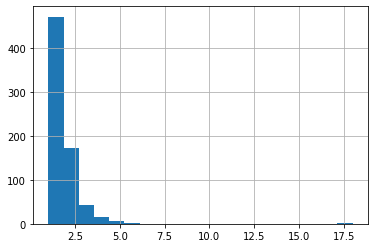

In [34]:
df['belongs_to_collection'].value_counts().hist(bins=20)

In [35]:
collection_counts = count_categories(df['belongs_to_collection'])

In [36]:
list(df[df['belongs_to_collection']=='645']['title'])

['Casino Royale',
 'Moonraker',
 'The Spy Who Loved Me',
 'From Russia with Love',
 'Thunderball',
 'A View to a Kill',
 'Diamonds Are Forever',
 'GoldenEye',
 'Dr. No',
 'Goldfinger',
 'Octopussy',
 'Skyfall',
 "On Her Majesty's Secret Service",
 'Tomorrow Never Dies',
 'The Living Daylights',
 'Die Another Day',
 'The World Is Not Enough',
 'You Only Live Twice']

In [37]:
df['is_james_bond'] = df['belongs_to_collection'].apply(lambda x:1 if x=='645' else 0)

In [38]:
collection_score,fold_collection_score, fold_collection_count = get_revenue_dict(df,'belongs_to_collection')

In [39]:
df['collection_target_encoding'] = df[['belongs_to_collection','fold']].apply(lambda x:get_category_score(x[0],x[1],collection_score,collection_counts,fold_collection_score,fold_collection_count,m_belongs_to_collection),axis=1)

In [40]:
df = df.drop(['belongs_to_collection'], axis=1)

<font size="4" >
    spoken_languages: 
</font>

This feature includes the languages in which the movie is in. We transform it to a format of lists of the available languages and then to target encoding and produce one hot encoding for english and feature of number of spoken languages.

In [41]:
df['spoken_languages']

0       [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
1                [{'iso_639_1': 'en', 'name': 'English'}]
2                [{'iso_639_1': 'en', 'name': 'English'}]
3                [{'iso_639_1': 'en', 'name': 'English'}]
4                [{'iso_639_1': 'en', 'name': 'English'}]
                              ...                        
5210            [{'iso_639_1': 'fr', 'name': 'Français'}]
5211             [{'iso_639_1': 'en', 'name': 'English'}]
5212             [{'iso_639_1': 'en', 'name': 'English'}]
5213             [{'iso_639_1': 'en', 'name': 'English'}]
5214             [{'iso_639_1': 'en', 'name': 'English'}]
Name: spoken_languages, Length: 5215, dtype: object

In [42]:
def get_languages_list(item):
    item = ast.literal_eval(item)
    languages = [language_dict['iso_639_1'] for language_dict in item]
    return languages

In [43]:
df['spoken_languages'] = df['spoken_languages'].apply(lambda x:get_languages_list(x))

In [44]:
df['spoken_languages'][:5]

0    [en, fr]
1        [en]
2        [en]
3        [en]
4        [en]
Name: spoken_languages, dtype: object

In [45]:
df[['spoken_languages','revenue']]

,spoken_languages,revenue
0,"[en, fr]",890871626
1,[en],154323
2,[en],176236
3,[en],14564027
4,[en],61399552
...,...,...
5210,[fr],345280
5211,[en],30859000
5212,[en],6100000
5213,[en],72258126


In [46]:
df['spoken_languages_amount'] = df['spoken_languages'].apply(lambda x: len(x))
df['english_speaking'] = df['spoken_languages'].apply(lambda x: 1 if 'en' in x else 0)

In [47]:
spoken_languages_count = get_frequency(df['spoken_languages'])

In [48]:
df, spoken_languages_score = extract_target_encoding_features(df,'spoken_languages',spoken_languages_count,m_spoken_languages)

In [49]:
df = df.drop(['spoken_languages'], axis=1)

<font size="4" >
    genres: 
</font>

In [50]:
def get_genres_list(item):
    item = ast.literal_eval(item)
    genres = [genre_dict['name'] for genre_dict in item]
    return genres

In [51]:
df['genres'] = df['genres'].apply(lambda x:get_genres_list(x))

In [52]:
genres_by_movie = list(df['genres'])
all_genres = set_from_lists(genres_by_movie)

In [53]:
for genre in all_genres:
    genre_binary = []
    for movie in genres_by_movie:
        if genre in movie:
            genre_binary.append(1)
        else:
            genre_binary.append(0)
    df[genre+'_movie'] = genre_binary

In [54]:
df = df.drop(['genres'], axis=1)

<font size="4" >
    Original_language: 
</font>

In [55]:
top_languages = ['en','cn','de','es','fr','hi','it','ja','ko','ru','zh']

In [56]:
for language in top_languages:
    df[language+'_original'] = df['original_language'].apply(lambda x: 1 if x == language else 0 )

In [57]:
language_counts = count_categories(df['original_language'])
language_score,language_fold_score,language_fold_count = get_revenue_dict(df,'original_language')
df['original_language_target_encoding'] = df[['original_language','fold']].apply(lambda x:get_category_score(x[0],x[1], language_score,language_counts,language_fold_score,language_fold_count,m_original_language),axis=1)

In [58]:
df = df.drop(['original_language'], axis=1)

<font size="4" >
    production companies: 
</font>

In [59]:
def apperance_count(movie_list):
    apperances = dict()
    for movie in movie_list:
        for participant in movie:
            if participant not in apperances:
                apperances[participant] = 0
        apperances[participant] += 1
    return apperances

In [60]:
def get_companies_list(item):
    item = ast.literal_eval(item)
    companies = [companies_dict['name'] for companies_dict in item]
    return companies

In [61]:
df['production_companies'] = df['production_companies'].apply(lambda x:get_companies_list(x))

In [62]:
df['production_companies_amount'] = df['production_companies'].apply(lambda x: len(x))

In [63]:
companies_by_movie = list(df['production_companies'])
all_companies = set_from_lists(companies_by_movie)

In [64]:
companies = apperance_count(companies_by_movie)

In [65]:
top_copanies = [company_name for company_name,apperences in companies.items() if apperences >= 10]

In [66]:
top_company_per_movie = []
for movie in companies_by_movie:
    flag = False
    for company in movie:
        if company in top_copanies:
            flag = True
    top_company_per_movie.append(int(flag))

In [67]:
df['top_production_company'] = top_company_per_movie

In [68]:
production_comapny_count = get_frequency(df['production_companies'])

In [69]:
df,production_comapny_score = extract_target_encoding_features(df,'production_companies',production_comapny_count,m_production_comapnies)

In [70]:
df = df.drop(['production_companies'], axis=1)

<font size="4" >
    production countries: 
</font>

In [71]:
def get_countries_list(item):
    item = ast.literal_eval(item)
    countries = [countries_dict['name'] for countries_dict in item]
    return countries

In [72]:
df['production_countries'] = df['production_countries'].apply(lambda x:get_countries_list(x))

In [73]:
country_by_movie = list(df['production_countries'])

In [74]:
countries_count = apperance_count(country_by_movie)

In [75]:
top_countries = [country for country in countries_count if countries_count[country] >= 150]

In [76]:
top_country_per_movie = []
american_production = []
for movie in country_by_movie:
    flag = False
    american = False
    for country in movie:
        if country in top_countries:
            flag = True
        if country == 'United States of America':
            american = True
    top_country_per_movie.append(int(flag))
    american_production.append(int(american))

In [77]:
df['top_country'] = top_country_per_movie
df['american_production'] = american_production

In [78]:
country_count = get_frequency(df['production_countries'])
df,countries_score = extract_target_encoding_features(df,'production_countries',country_count,m_country_count)

In [79]:
df = df.drop(['production_countries'], axis=1)

<font size="4" >
    cast: 
</font>

In [80]:
def get_actors_list(item):
    item = ast.literal_eval(item)
    actors = [actor_dict['id'] for actor_dict in item]
    return actors

In [81]:
df['cast_list'] = df['cast'].apply(lambda x: get_actors_list(x))
df['cast_size'] = df['cast'].apply(lambda x: len(x))

In [82]:
cast_count = get_frequency(df['cast_list'])
df,cast_score = extract_target_encoding_features(df,'cast_list',cast_count,m_cast)

In [83]:
df = df.drop(['cast_list','cast'],axis=1)

<font size="4" >
    crew: 
</font>

In [84]:
def get_crew_member(item, job):
    director = []
    item = ast.literal_eval(item)
    for crew_member in item:
        if crew_member['job'] == job:
            director.append(crew_member['id'])
    return director

In [85]:
df['director'] = df['crew'].apply(lambda x: get_crew_member(x, 'Director'))
df['producer'] = df['crew'].apply(lambda x: get_crew_member(x, 'Producer'))
df['crew_size'] = df['crew'].apply(lambda x: len(ast.literal_eval(x)))

In [86]:
director_count = get_frequency(df['director'])
df,director_score = extract_target_encoding_features(df,'director',director_count,m_director)
producer_count = get_frequency(df['producer'])
df,producer_score = extract_target_encoding_features(df,'producer',producer_count,m_producer)


In [87]:
df = df.drop(['crew','director','producer'], axis=1)


<font size="5" >Text analysis:</font>

There are 3 text features: title, overview, tagline.

The text is preprocessed:
* lowercase
* puctuation removal 
* stemming

We split the text to words and explore word frequencies.

Now the words list are analysed as the multiple category variables.

In [88]:
stemmer = PorterStemmer()
def text_preprocessing(sentence):
    sentence = sentence.lower()
    sentence = sentence.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in sentence.split()]
    return words

<font size="4" >title:</font>

Title of movie

In [89]:
df['title']

0                                     Spider-Man 3
1                Silent Night, Deadly Night Part 2
2       Scotty and the Secret History of Hollywood
3                                       Hellraiser
4                      National Lampoon's Vacation
                           ...                    
5210             La Cage aux Folles 3: The Wedding
5211                  The Texas Chain Saw Massacre
5212                                 Almost Heroes
5213         Eternal Sunshine of the Spotless Mind
5214                                      3 Ninjas
Name: title, Length: 5215, dtype: object

In [90]:
df['title'] = df['title'].apply(lambda x:text_preprocessing(x))

In [91]:
original_title_count = get_frequency(df['title'])

nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

original_title_count_stopwords = {word:count for word,count in original_title_count.items() if word not in stop_words}

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
most_frequent = sorted(original_title_count_stopwords, key=original_title_count_stopwords.get, reverse=True)[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

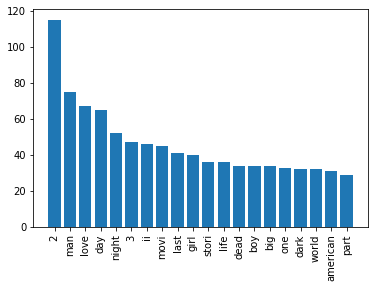

In [93]:
plt.bar(most_frequent, [original_title_count_stopwords[word] for word in most_frequent])
plt.xticks(rotation=90)

In [94]:
df,title_score = extract_target_encoding_features(df,'title',original_title_count,m_title)
df = df.drop(['title','original_title'],axis=1)

<font size="4" >overview:</font>

movie description

In [95]:
df['overview']

0       The seemingly invincible Spider-Man goes up ag...
1       After being traumatized by his brother Billy's...
2       A deliciously scandalous portrait of unsung Ho...
3       An unfaithful wife encounters the zombie of he...
4       Clark Griswold is on a quest to take his famil...
                              ...                        
5210    Third and final version of the La Cage aux Fol...
5211    When Sally hears that her grandfather's grave ...
5212    Two hapless explorers lead an ill-fated 1804 e...
5213    Joel Barish, heartbroken that his girlfriend u...
5214    Each year, three brothers Samuel, Jeffrey and ...
Name: overview, Length: 5215, dtype: object

In [96]:
df['overview'].isna().sum()

6

In [97]:
df['overview'] = df['overview'].replace(np.nan, '', regex=True)

In [98]:
df['overview'] = df['overview'].apply(lambda x:text_preprocessing(x))

In [99]:
overview_count = get_frequency(df['overview'])
stop_words = set(stopwords.words('english')) 
overview_count_stopwords = {word:count for word,count in overview_count.items() if word not in stop_words}

In [100]:
most_frequent = sorted(overview_count_stopwords, key=overview_count_stopwords.get, reverse=True)[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

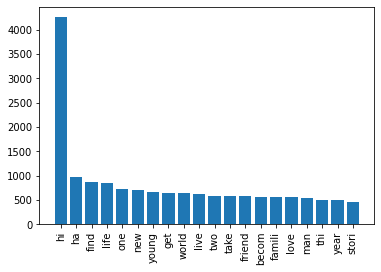

In [101]:
plt.bar(most_frequent, [overview_count_stopwords[word] for word in most_frequent])
plt.xticks(rotation=90)

In [102]:
df,overview_score = extract_target_encoding_features(df,'overview',overview_count,m_overview)
df = df.drop(['overview'],axis=1)

<font size="4" >tagline:</font>

movie slogen

In [103]:
df['tagline']

0                                      The battle within.
1              The nightmare is about to begin ... AGAIN!
2                                                     NaN
3                             He'll tear your soul apart.
4       Every summer Chevy Chase takes his family on a...
                              ...                        
5210                                                  NaN
5211      Who will survive and what will be left of them?
5212    Almost History... Almost Legends... Mostly Rid...
5213    You can erase someone from your mind. Getting ...
5214    Crosses Teenage Mutant Ninja Turtles and Home ...
Name: tagline, Length: 5215, dtype: object

In [104]:
df['tagline'].isna().sum()

1025

In [105]:
df['no_tagline'] = df['tagline'].isna().astype(int) # Add feature for missing taglines 

In [106]:
df['tagline'] = df['tagline'].replace(np.nan, '', regex=True)
df['tagline'] = df['tagline'].apply(lambda x:text_preprocessing(x))
tagline_count = get_frequency(df['tagline'])
stop_words = set(stopwords.words('english')) 
tagline_count_stopwords = {word:count for word,count in tagline_count.items() if word not in stop_words}

In [107]:
most_frequent = sorted(tagline_count_stopwords, key=tagline_count_stopwords.get, reverse=True)[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

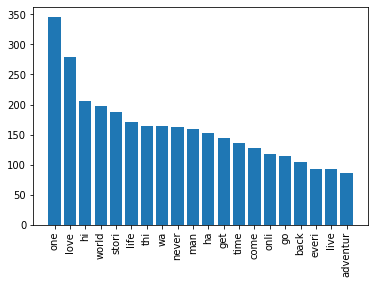

In [108]:
plt.bar(most_frequent, [tagline_count_stopwords[word] for word in most_frequent])
plt.xticks(rotation=90)

In [109]:
df,tagline_score = extract_target_encoding_features(df,'tagline',tagline_count,m_tagline)
df = df.drop(['tagline'],axis=1)

<font size="4" >
    budget:
</font>

Movie budget

In [110]:
df['budget']

0       258000000
1          250000
2               0
3         1000000
4        15000000
          ...    
5210            0
5211        85000
5212     30000000
5213     20000000
5214      6500000
Name: budget, Length: 5215, dtype: int64

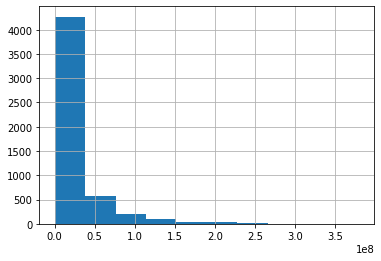

In [111]:
df['budget'].hist()

<font size="4" >
    homepage:
</font>

Link to website, converted to boolean variable (is there a homepage)

In [112]:
df['homepage']

0       https://www.sonypictures.com/movies/spiderman3
1                                                  NaN
2                         https://www.scottymovie.com/
3                                                  NaN
4                                                  NaN
                             ...                      
5210                                               NaN
5211                                               NaN
5212                                               NaN
5213                    http://www.eternalsunshine.com
5214                                               NaN
Name: homepage, Length: 5215, dtype: object

In [113]:
df['homepage'].isna().sum()

3449

In [114]:
df['no_homepage'] = df['homepage'].isna().astype(int)

In [115]:
df = df.drop('homepage', axis=1)

<font size="4" >
    popularity:
</font>

Popularity of movie

In [116]:
df['popularity']

0       22.024
1        4.756
2        4.746
3       13.828
4       15.070
         ...  
5210     3.050
5211    11.580
5212     7.946
5213    19.693
5214    10.913
Name: popularity, Length: 5215, dtype: float64

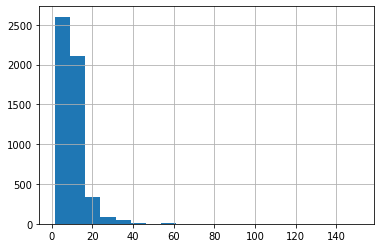

In [117]:
df['popularity'].hist(bins=20)

<font size="4" >
    runtime:
</font>



In [118]:
df['runtime']

0       139.0
1        88.0
2        98.0
3        94.0
4        99.0
        ...  
5210     87.0
5211     83.0
5212     90.0
5213    108.0
5214     84.0
Name: runtime, Length: 5215, dtype: float64

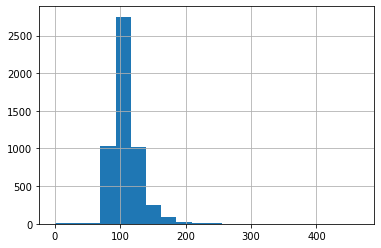

In [119]:
df['runtime'].hist(bins=20)

In [120]:
df['runtime'].isna().sum()

4

In [121]:
df['runtime'] = df['runtime'].fillna(df['runtime'].mean())

<font size="4" >
    status:
</font>

Only one category, removed from analysis

In [122]:
df['status']

0       Released
1       Released
2       Released
3       Released
4       Released
          ...   
5210    Released
5211    Released
5212    Released
5213    Released
5214    Released
Name: status, Length: 5215, dtype: object

In [123]:
set(df['status'])

{'Released'}

In [124]:
df = df.drop('status',axis=1)

<font size="4" >
    video:
</font>

link to video

In [125]:
df['video']

0       False
1       False
2       False
3       False
4       False
        ...  
5210    False
5211    False
5212    False
5213    False
5214    False
Name: video, Length: 5215, dtype: bool

In [126]:
df['video'].dtypes

dtype('bool')

In [127]:
df['video'] = df['video'].astype(int)

In [128]:
len(df[df['video']==1])

18

<font size="4" >
vote_average
</font>

In [129]:
df['vote_average']

0       6.2
1       4.3
2       6.5
3       6.9
4       7.1
       ... 
5210    4.7
5211    7.3
5212    5.6
5213    8.1
5214    5.7
Name: vote_average, Length: 5215, dtype: float64

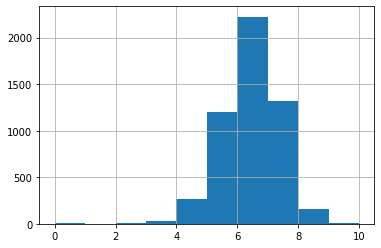

In [130]:
df['vote_average'].hist()

vote_count

In [131]:
df['vote_count']

0       8180
1         68
2         15
3       1115
4        782
        ... 
5210      29
5211    1483
5212      91
5213    8753
5214     240
Name: vote_count, Length: 5215, dtype: int64

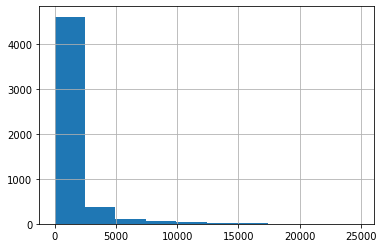

In [132]:
df['vote_count'].hist()

<font size="4" >
Keywords
</font>

In [133]:
df['Keywords']

0       [{'id': 697, 'name': 'loss of loved one'}, {'i...
1       [{'id': 65, 'name': 'holiday'}, {'id': 1991, '...
2                        [{'id': 158718, 'name': 'lgbt'}]
3       [{'id': 1449, 'name': 'underworld'}, {'id': 31...
4       [{'id': 5493, 'name': 'relatives'}, {'id': 731...
                              ...                        
5210    [{'id': 237, 'name': 'gay'}, {'id': 824, 'name...
5211    [{'id': 1420, 'name': 'gas station'}, {'id': 1...
5212    [{'id': 1721, 'name': 'fight'}, {'id': 3930, '...
5213    [{'id': 563, 'name': 'deja vu'}, {'id': 802, '...
5214    [{'id': 380, 'name': 'sibling relationship'}, ...
Name: Keywords, Length: 5215, dtype: object

In [134]:
def get_Keywords_list(item):
    item = ast.literal_eval(item)
    Keywords = [Keyword_dict['name'] for Keyword_dict in item]
    return Keywords

In [135]:
df['Keywords'] = df['Keywords'].apply(lambda x: get_Keywords_list(x))

In [136]:
df['Keywords']

0       [loss of loved one, dual identity, amnesia, sa...
1       [holiday, santa claus, sequel, murder, serial ...
2                                                  [lgbt]
3       [underworld, seduction, supernatural, revenge,...
4       [relatives, road trip, domestic life, family v...
                              ...                        
5210                      [gay, drag queen, gay marriage]
5211    [gas station, texas, van, midnight movie, leat...
5212    [fight, bravery, slapstick, native american, b...
5213    [deja vu, regret, jealousy, amnesia, dream, op...
5214    [sibling relationship, hero, rivalry, rescue, ...
Name: Keywords, Length: 5215, dtype: object

In [137]:
Keywords_count = get_frequency(df['Keywords'])

In [138]:
most_frequent = sorted(Keywords_count, key=Keywords_count.get, reverse=True)[:20]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

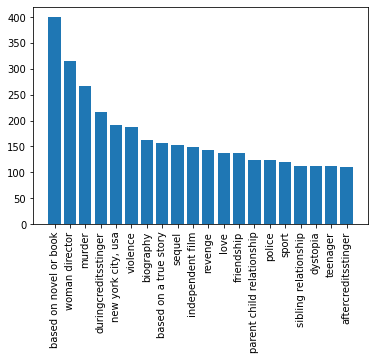

In [139]:
plt.bar(most_frequent, [Keywords_count[word] for word in most_frequent])
plt.xticks(rotation=90)

In [140]:
df,Keywords_score = extract_target_encoding_features(df,'Keywords',Keywords_count,m_keywords)

In [141]:
df = df.drop(['Keywords'],axis=1)

In [142]:
df = df.drop(['id','imdb_id','poster_path','fold','random_index'],axis=1)

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [144]:
X = df.drop(['revenue','ln_revenue'],axis=1)
Y = df['ln_revenue']

In [145]:
columns_list = ['budget','popularity','runtime','video','vote_average','vote_count','release_year','release_month',
       'no_collection','is_james_bond','spoken_languages_amount', 'english_speaking',
       'Adventure_movie', 'TV Movie_movie', 'Mystery_movie', 'Fantasy_movie',
       'Science Fiction_movie', 'Family_movie', 'Western_movie', 'War_movie',
       'Animation_movie', 'Documentary_movie', 'Crime_movie', 'Thriller_movie',
       'Music_movie', 'Action_movie', 'Romance_movie', 'History_movie',
       'Horror_movie', 'Comedy_movie', 'Drama_movie', 'en_original',
       'cn_original', 'de_original', 'es_original', 'fr_original',
       'hi_original', 'it_original', 'ja_original', 'ko_original',
       'ru_original', 'zh_original','production_companies_amount','top_production_company','top_country',
       'american_production','cast_size','crew_size','no_tagline','no_homepage']
       

In [146]:
from sklearn.model_selection import cross_val_score
X = X[columns_list]
regr = RandomForestRegressor(max_depth=20,random_state=1)
regr.fit(X, Y)
scores = list(cross_val_score(regr, X, Y, cv=5))
print(statistics.mean(scores))
print(statistics.stdev(scores))
print()

0.5419588580275361
0.03953503793263743



<font size="5" >Feature selection</font>

We have a lot of target encoding features. 
We check which target encoding features improve the model enough with low variance between folds.
We include only some of those in the final model.

In [147]:
import statistics
from sklearn.model_selection import cross_val_score
feature_mean = {}
feature_var = {}
for feature in df.columns:
    if feature not in columns_list and feature not in ['revenue','ln_revenue']:
        X = df[columns_list+[feature]]
        regr = RandomForestRegressor(max_depth=20, random_state=1)
        regr.fit(X, Y)
        scores = list(cross_val_score(regr, X, Y, cv=5))
        print(feature)
        feature_var[feature] = statistics.variance(scores)
        feature_mean[feature] = statistics.mean(scores)
        print(statistics.mean(scores))
        print(statistics.stdev(scores))
        print()

collection_target_encoding
0.5426046914137981
0.03791868249964827

min_spoken_languages_score
0.5410271772026218
0.040513642120839195

max_spoken_languages_score
0.5392960224837051
0.043094499509156094

mean_spoken_languages_score
0.539874983049783
0.04222460729318608

median_spoken_languages_score
0.5395636722539932
0.04070144677599558

original_language_target_encoding
0.5419973741985914
0.0367518394115648

min_production_companies_score
0.5430732998260948
0.03493599989454237

max_production_companies_score
0.540399483039861
0.037488478097366676

mean_production_companies_score
0.5409360425120862
0.038068393761795466

median_production_companies_score
0.5441606419595014
0.04120476864596053

min_production_countries_score
0.5432769126573264
0.0390964408490078

max_production_countries_score
0.5392552649990915
0.038988816849922066

mean_production_countries_score
0.5412971751579752
0.038697449545020565

median_production_countries_score
0.5426724275822167
0.036037525394521035

min_cast

In [148]:
columns_list = ['budget','popularity','runtime','video','vote_average','vote_count','release_year','release_month',
       'no_collection','is_james_bond','spoken_languages_amount', 'english_speaking',
       'Adventure_movie', 'TV Movie_movie', 'Mystery_movie', 'Fantasy_movie',
       'Science Fiction_movie', 'Family_movie', 'Western_movie', 'War_movie',
       'Animation_movie', 'Documentary_movie', 'Crime_movie', 'Thriller_movie',
       'Music_movie', 'Action_movie', 'Romance_movie', 'History_movie',
       'Horror_movie', 'Comedy_movie', 'Drama_movie', 'en_original',
       'cn_original', 'de_original', 'es_original', 'fr_original',
       'hi_original', 'it_original', 'ja_original', 'ko_original',
       'ru_original', 'zh_original','production_companies_amount','top_production_company','top_country',
       'american_production','cast_size','crew_size','no_tagline','no_homepage','max_Keywords_score','min_spoken_languages_score',
        'collection_target_encoding','min_production_companies_score','mean_title_score','min_tagline_score']

In [149]:
from sklearn.model_selection import cross_val_score
X = df[columns_list]
regr = RandomForestRegressor(max_depth=20, random_state=1)

scores = list(cross_val_score(regr, X, Y, cv=5))
print(statistics.mean(scores))
print(statistics.stdev(scores))
print()

0.5390265186995644
0.041450885975351376



In [150]:
regr = RandomForestRegressor(max_depth=20, random_state=1)
regr.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [151]:
sorted([(importance,feature) for feature,importance in zip(list(X.columns),list(regr.feature_importances_))])

[(9.706808894777038e-07, 'is_james_bond'),
 (0.00026063249822379025, 'hi_original'),
 (0.0003395769456564728, 'es_original'),
 (0.00037229727378342156, 'video'),
 (0.0004402583486793027, 'ru_original'),
 (0.0005119811684780308, 'cn_original'),
 (0.0007858737066528119, 'it_original'),
 (0.0008515408288257288, 'ko_original'),
 (0.0008624468979337933, 'ja_original'),
 (0.0012028075516322281, 'de_original'),
 (0.0012057048169752253, 'History_movie'),
 (0.0014349439968192894, 'Fantasy_movie'),
 (0.0015629707516471008, 'Animation_movie'),
 (0.0015901999639239862, 'TV Movie_movie'),
 (0.0016849112625441961, 'Documentary_movie'),
 (0.001723385433715559, 'zh_original'),
 (0.00190012820948522, 'War_movie'),
 (0.002000753787638834, 'Western_movie'),
 (0.0021052037458820032, 'Crime_movie'),
 (0.002126965191635307, 'Mystery_movie'),
 (0.0023003291766097336, 'english_speaking'),
 (0.002389304626121511, 'Romance_movie'),
 (0.002551040352606932, 'top_country'),
 (0.0026805153621339757, 'no_homepage'),

<font size="5" >
Random Forest Hyperparameter tunning
 </font>
  
Since the loss is rmsle we train on the log(reveneu)

In [ ]:
n_estimators = [200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X, Y)

In [ ]:
rf_random.best_params_

In [ ]:
from sklearn.model_selection import cross_val_score
regr = RandomForestRegressor(max_depth=110,min_samples_split=5, min_samples_leaf = 4 ,max_features='auto',bootstrap=True, random_state=1)
regr.fit(X,Y)
scores = list(cross_val_score(regr, X, Y, cv=5,scoring='neg_root_mean_squared_error'))
print(statistics.mean(scores))
print(statistics.stdev(scores))
print()

<font size="5" >
XGBoost Hyperparameter tunning
</font>

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [ ]:
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X,Y)

In [ ]:
final_params = search.best_params_

In [ ]:
final_params

In [ ]:
from sklearn.model_selection import cross_val_score
xgboost_model = xgb.XGBRegressor(objective="reg:squarederror",colsample_bytree=final_params['colsample_bytree'],
                       gamma=final_params['gamma'],learning_rate=final_params['learning_rate'],
                       max_depth=final_params['max_depth'],n_estimators=final_params['n_estimators'],
                       subsample=final_params['subsample'], random_state=42)
xgboost_model.fit(X,Y)
scores = list(cross_val_score(xgboost_model, X, Y, cv=5,scoring='neg_root_mean_squared_error'))
print(statistics.mean(scores))
print(statistics.stdev(scores))
print()

In [ ]:
model_dict = {'model':xgboost_model,
              'collection_score':collection_score,'collection_count':collection_counts,
              'spoken_languages_score':spoken_languages_score,'spoken_languages_counts':spoken_languages_count,
              'genres_list':all_genres,
              'top_languages':top_languages,'languages_score':language_score,'languages_count':language_counts,
              'top_companies':top_copanies,'production_comapnies_count':production_comapny_count,'production_comapnies_score':production_comapny_score,
              'countries_count':country_count,'countries_score':countries_score,'top_countries':top_countries,
              'cast_counts':cast_count,'cast_score':cast_score,
              'producer_count':producer_count,'producer_score':producer_score,'director_count':director_count,'director_score':director_score,
              'title_count':original_title_count,'title_score':title_score,
              'overview_count':overview_count,'overview_score':overview_score,
              'tagline_count':tagline_count,'tagline_score':tagline_score,
              'key_words_count':Keywords_count,'Keywords_score':Keywords_score,
             'average_revenue':average_revenue}


In [ ]:
import pickle
with open('model', 'wb') as f:
    pickle.dump(model_dict, f)